## Sim Demo

### Imports

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from env.imports import *

In [46]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

#### Check job specs

In [47]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 83.4%
RAM Usage: 8.9%
Available RAM: 917.7G
Total RAM: 1007.0G
52.4G


In [48]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 1
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.02 GB


In [49]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


In [50]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset
1
2
3
BEST CONFIG {'input_dim': 14760, 'activation': 'none', 'learning_rate': 0.0001, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.001, 'shared_weights': True, 'reduced_dim': 10, 'epochs': 120}
Number of learnable parameters in bilinear low rank model: 73800
Available GPUs: 1
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.02 GB
Best val loss so far at epoch 1: 0.0314
Best val loss so far at epoch 2: 0.0269
Best val loss so far at epoch 3: 0.0256
Epoch 5/120, Train Lo

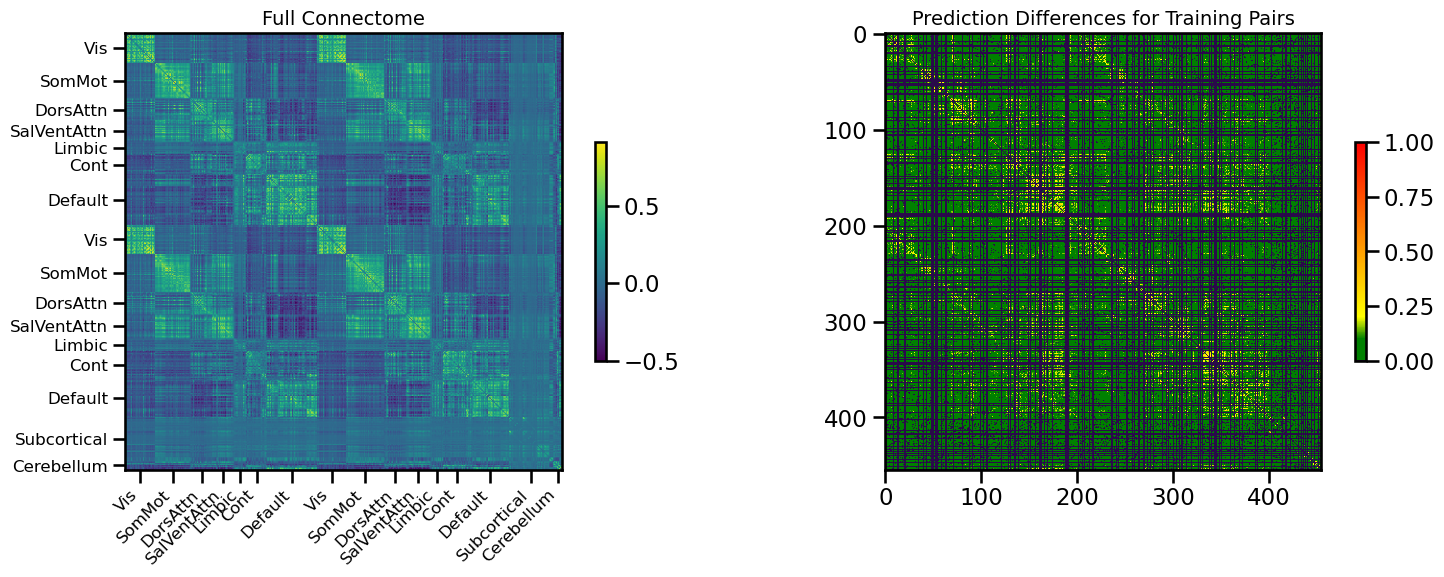

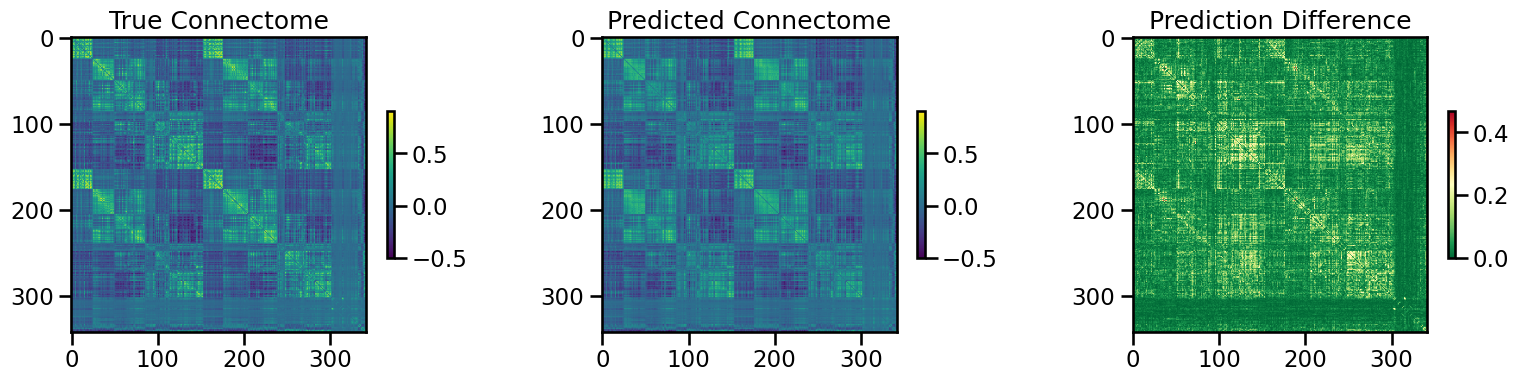

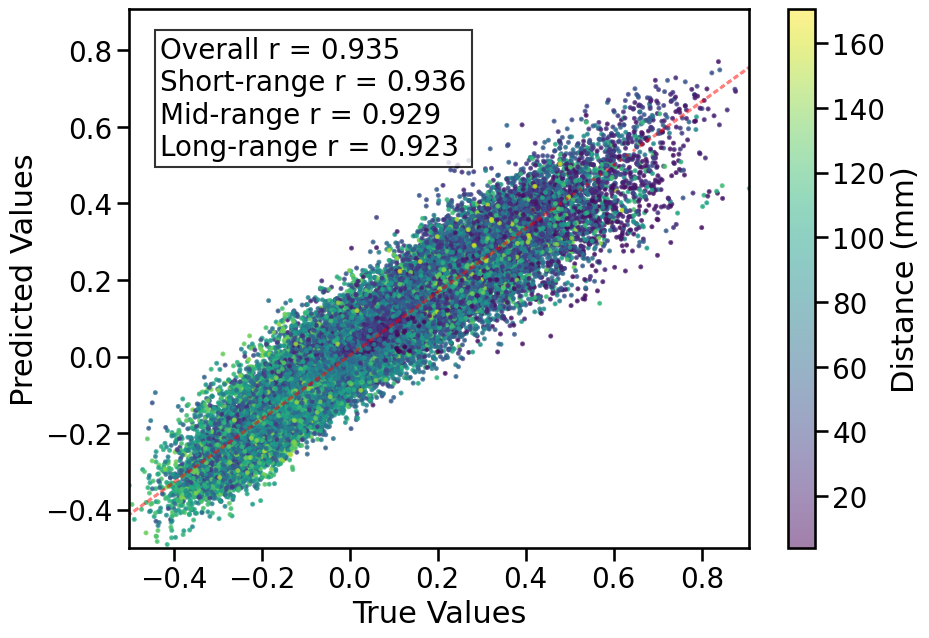

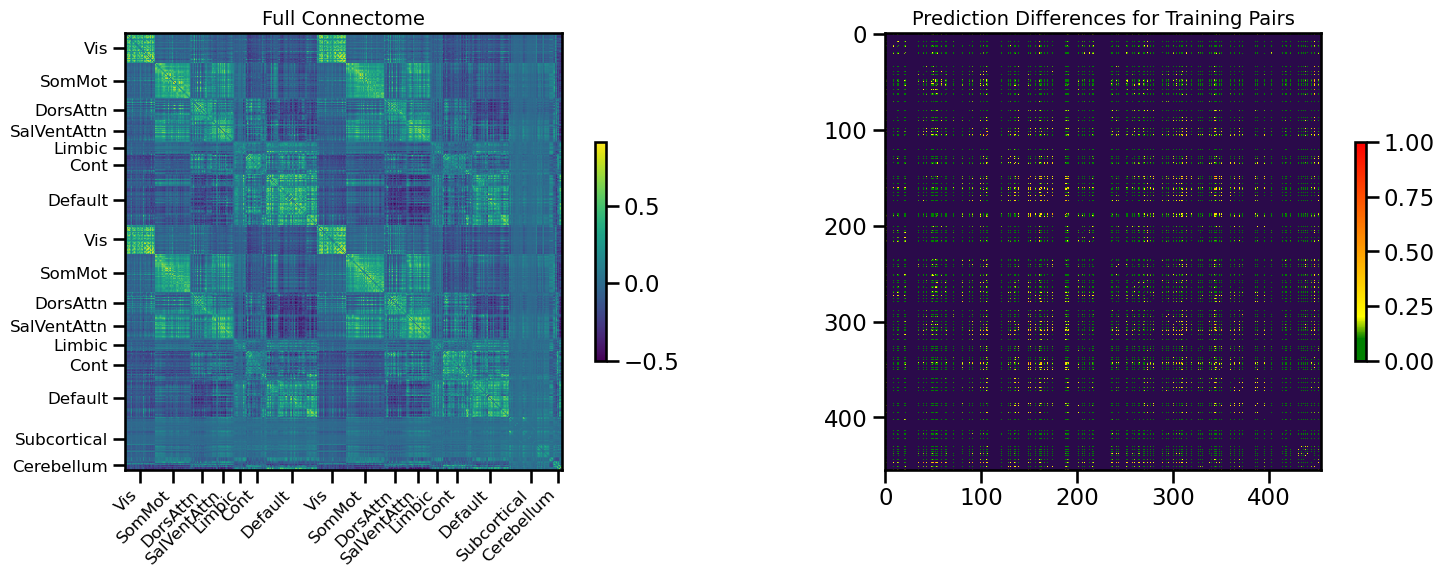

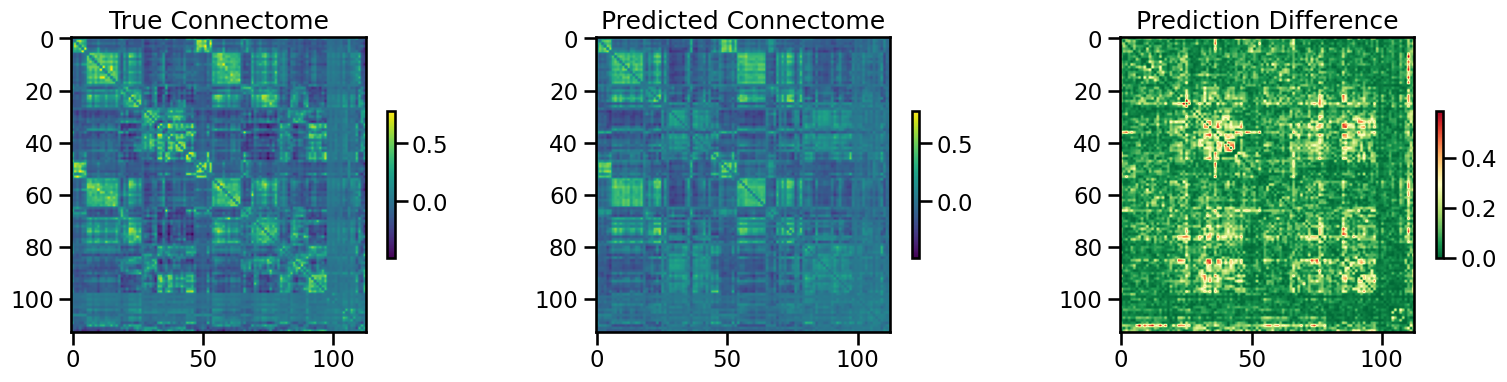

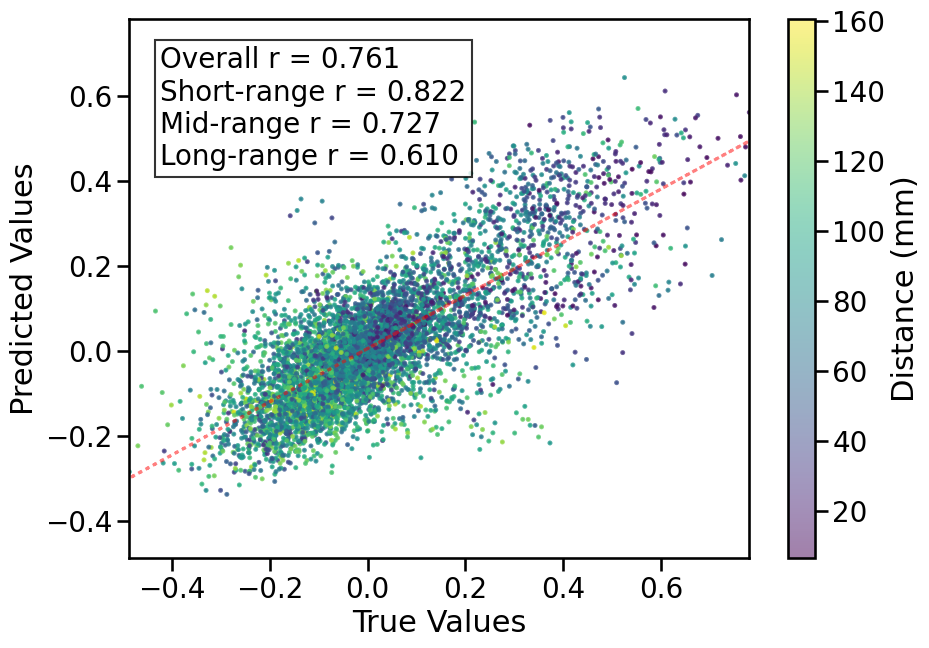


TRAIN METRICS: {'mse': 0.004355534, 'mae': 0.045876678, 'r2': 0.8715913741019361, 'pearson_corr': 0.9347712334290743, 'geodesic_distance': 16.632926599072967}
TEST METRICS: {'mse': 0.013954233, 'mae': 0.08481541, 'r2': 0.575124036124302, 'pearson_corr': 0.7608862712612088, 'geodesic_distance': 11.042714422152597}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'activation': Identity(), 'learning_rate': 0.0001, 'epochs': 120, 'batch_size': 256, 'regularization': 'l2', 'lambda_reg': 0.001, 'shared_weights': True}
CPU Usage: 81.8%
RAM Usage: 10.7%
Available RAM: 898.9G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 | 73% |  5% |


5691

In [52]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='bilinear_lowrank',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=None,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


  warnings.warn(



1
2
3
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'hidden_dims': [256, 128], 'learning_rate': 9e-05, 'batch_size': 512, 'dropout_rate': 0.2, 'weight_decay': 0.0001, 'epochs': 100}
Number of learnable parameters in MLP: 3812609
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.08 GB
Best val loss so far at epoch 1: 0.0297
Best val loss so far at epoch 2: 0.0270
Best val loss so far at epoch 3: 0.0251
Best val loss so far at epoch 4: 0.0213
Epoch 5/100, Train Loss: 0.0401, Val Loss: 0.0257
Best val loss so far at epoch 6: 0.0213
Best val loss so far at epoch 7: 0.0182
Epoch 10/100, Train Loss: 0.0140, Val Loss: 0.0166
Best val loss so far at epoch 10: 0.0166
Epoch 15/100, Train Loss: 0.0093, Val Loss: 0.0198
Best val loss so far at epoch 17: 0.0159
Epoch 20/100, Train Loss: 0.0078, Val Loss: 0.0185
Best val loss so far at epoch 23: 0.0152
Epoch 25/100, Train Loss: 0.0068, Val Loss: 0.0181
Epoch 30/100, Train Loss: 0.0063, Val Loss: 0.0310
Epoch 35/100, Train Lo

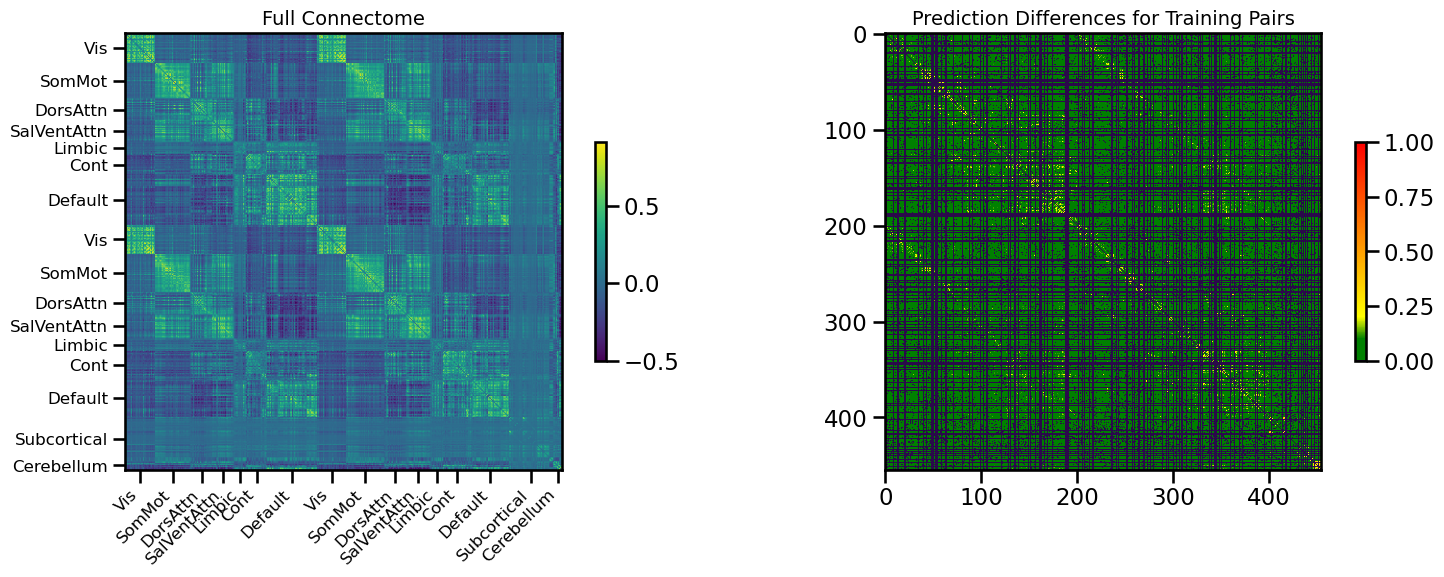

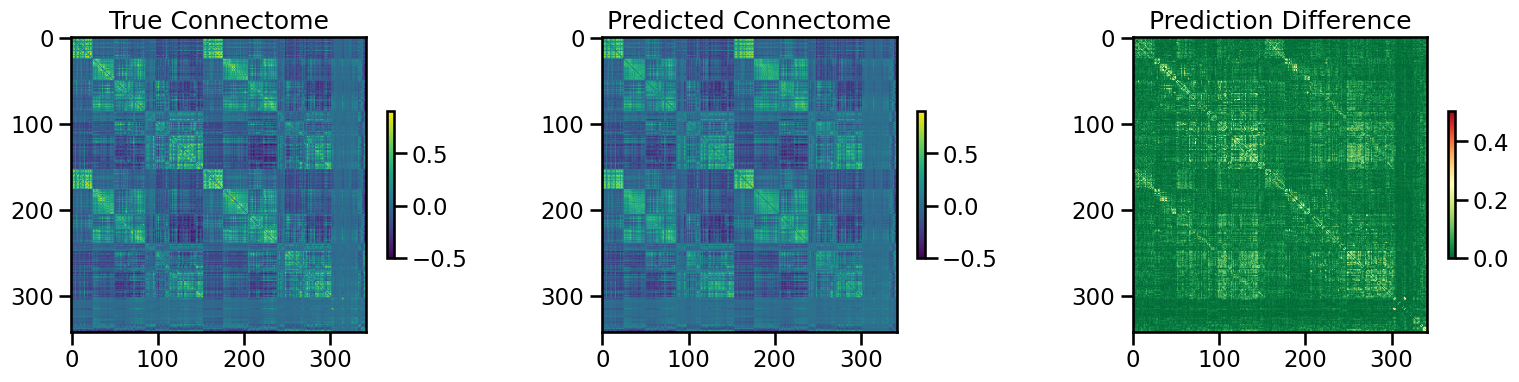

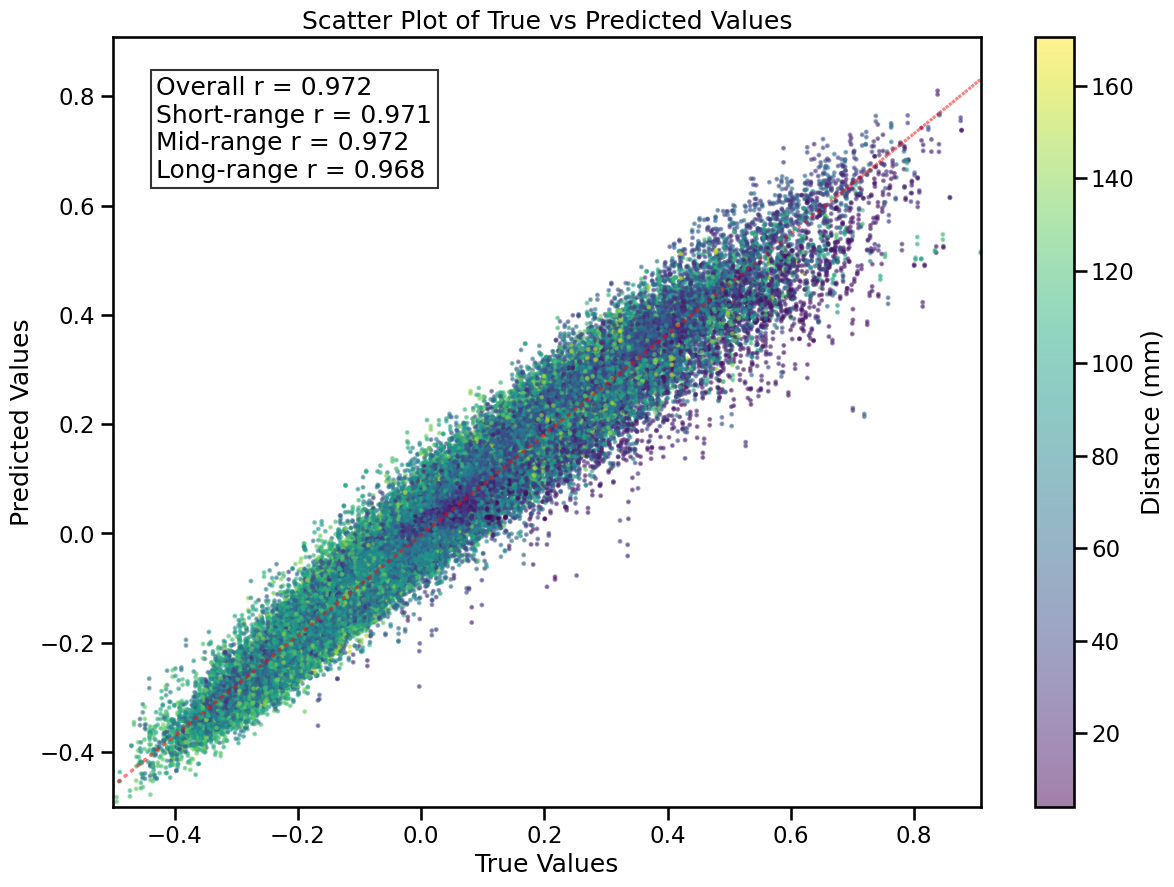

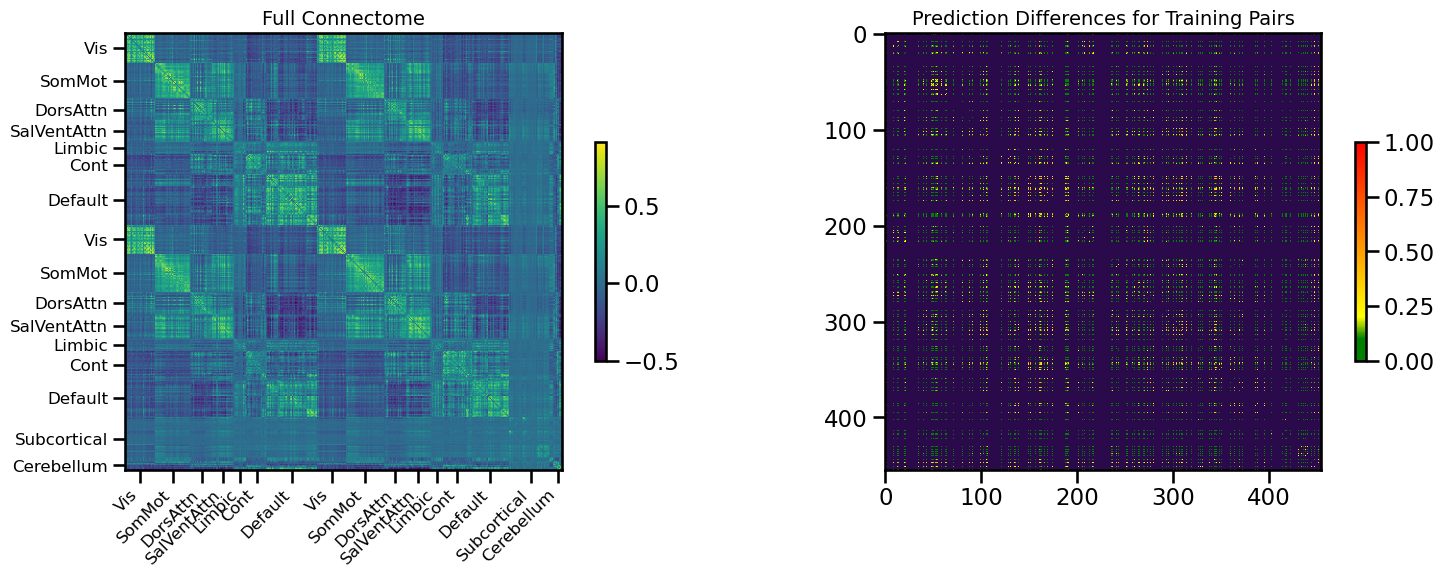

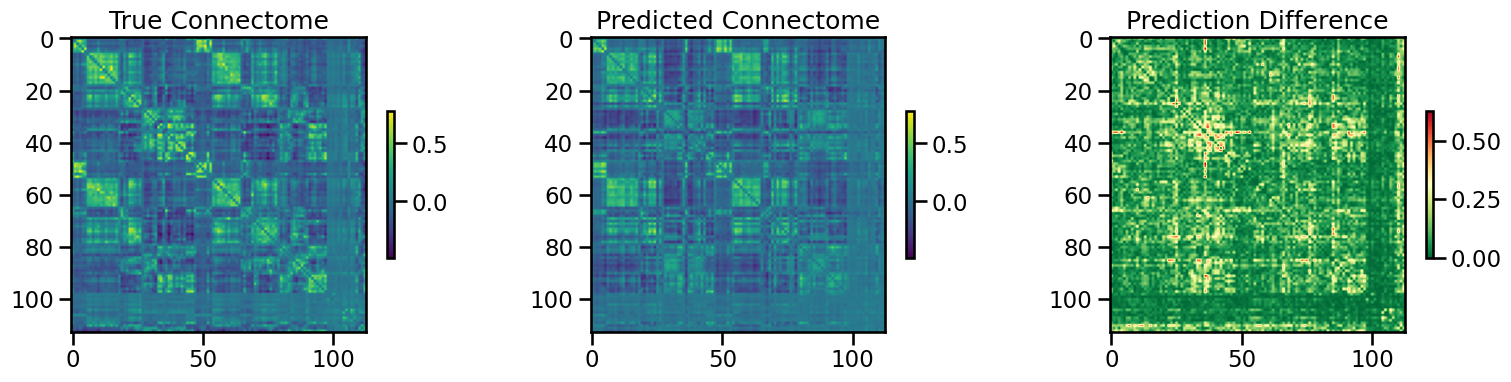

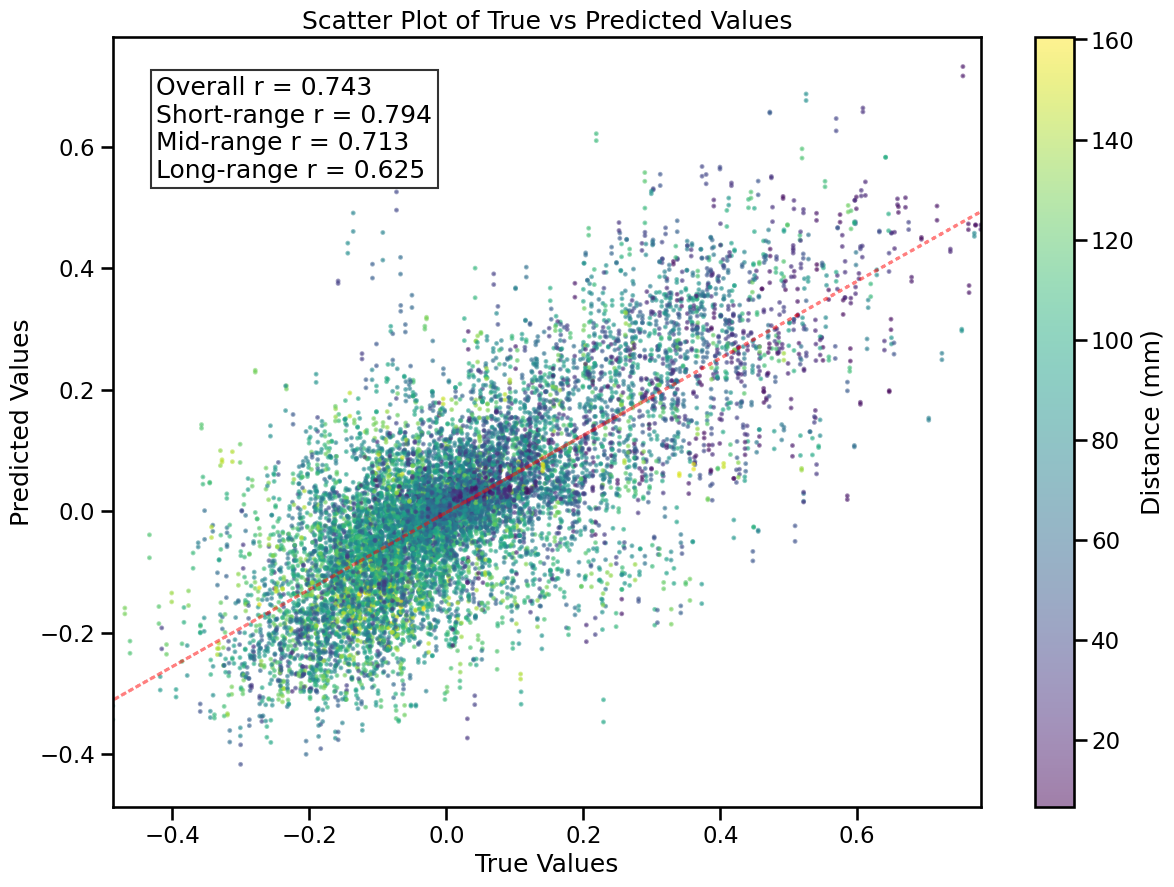


TRAIN METRICS: {'mse': 0.001913461, 'mae': 0.030205809, 'r2': 0.9435878803871821, 'pearson_corr': 0.9720177769539242, 'geodesic_distance': 18.476148856381194}
TEST METRICS: {'mse': 0.015207028, 'mae': 0.089124426, 'r2': 0.5369791793126639, 'pearson_corr': 0.742870500519473, 'geodesic_distance': 13.118527598982269}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 14760, 'binarize': False, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'epochs': 100}
CPU Usage: 63.1%
RAM Usage: 12.2%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 | 72% |  7% |


36455

In [34]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='dynamic_mlp',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=False,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()